## Inductively shunted superconducting circuits

In this notebook, we use Qcircuit to find the spectrum of the inductively shunted superconducting circuits based on the following paper:   
_inductively shunted superconducting circuits_  

First, we import the Qcircuit from circuitClass file and specify a number for each nodes on the circuit. The number for each node should be consecutive integer starts from zero(corresponds to circuit ground.) 

In [1]:
from circuitClass import *

<img src="pics/inductivelyShunted_pic1.png" width="300" />

We use Parameter Set for device A of the paper. Note that we added a very small junction $C_x$ to the circuit, because Qcircuit assumes that there is a capacitor between each two nodes of the circuit. If your model does not have a capacitor at specific edge just add a very small capacitor to that edge. 

<img src="pics/inductivelyShunted_pic2.png" width="350" />

We create the object of Qcircuit by initializing it with `circParam` dictionary.

In [2]:
# cicuitParam is a dictionary that contains the information about the graph structure,
# capacitor values, inductor values, and Josephson Junction Values.
# inductors should be in Henry
# capacitors should be in Farad
# JJ energies should be in Hz
circuitParam={'graph':[[0,1],[0,2],[0,3],[1,2],[2,3]],
            'inductors':[None,4.5*nH,None,15.6*nH,386*nH],
            'capacitors':[20.3*fF, 0.0001*fF, 5.3*fF,0,0],
            'JJs':[None,None,6.2*GHz,None,None]}

# cr is an object of Qcircuit
cr1 = Qcircuit(circuitParam)

By `cr1.setModeNumbers([m1,m2,m3])`, we set the accuracy of the solver. For this circuit, Qcircuit converges with $m_1=1,m_2=5$, and $m_3=22$. Next, we should call `cr1.configure()` to set up the equations needed to calculate the Hamiltonian.

In [8]:
# call this function to set the truncation number for each mode of the circuit. 
cr1.setModeNumbers([1,5,22])

# call this function to set up equations and preprocesses needed to calculate the Hamiltonian.
cr1.configure()

By applying `cr1.getExternalLinks()`, we find the inductive loops that we can apply external fluxes to them.

In [4]:
cr1.getExternalLinks()

[[0, 3, 2]]

Qcircuit tells us that we can apply external fluxes to inductive loops created by the `[0,3,2]` cycle. Therefore, by calling `cr1.setExcitation([phiExt])`, we apply array of external fluxes to that specific loop.

In [5]:
# set external fluxes for each inductive loops of the circuit.
phiExt = np.linspace(-0.1,0.6,100)*2*np.pi
cr1.setExcitation([phiExt])

By running the below cell, Qcircuit calculates the Hamiltonian and find the first 5 eigenvalues and eigenvectors of the system for each external fluxes.

In [6]:
# run the solver to calculate the eigenvalues and eigenvectors of the Hamiltonian for 
# specific number of bands
cr1.run(numBand = 10,showLoading=False)

The eigenValues are stored in the `cr1.HamilEigVal` variable in units of angular frequancy. The first index of the `cr1.HamilEigVal` refers to band number, and the second index refers to the index of external fluxes specified in `phiExt`. Therefore, the next cell plots the spectrum of the circuit.

(0, 18)

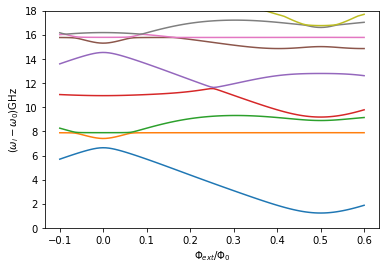

In [7]:
plt.figure()
for i in range(1,10):
    plt.plot(phiExt/2/np.pi,(cr1.HamilEigVal[i,:]-cr1.HamilEigVal[0,:]).real/GHz/2/np.pi)

plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("($\omega_i-\omega_0$)GHz")
plt.ylim([0,18])

The next cell shows the spectrum from the figure 2 of the paper, which is the same spectrum that Qcircuit calculated.

<img src="pics/inductivelyShunted_pic3.png" width="380" align = "left" />